In [1]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 1. TimeGAN model
from timegan import timegan
# 2. Data loading
from data_loading import real_data_loading, sine_data_generation, real_data_loading_sce2
# 3. Metrics
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization

import tensorflow as tf

import os, time

In [2]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = "3"
config = tf.compat.v1.ConfigProto() # Another Version: config = tf.ConfigProto()
config.gpu_options.allow_growth = True

In [3]:
## Data loading
data_name = 'energy'
seq_len = 24
test_per = 0.05 # 5% observed data
observe_per = 0.50 # 5% of most recent 

if data_name in ['stock', 'energy']:
    train_data, test_data = real_data_loading_sce2(data_name, seq_len, test_per, observe_per)
else:
    print("Data Loading Wrong!!!!")
print(data_name + ' dataset is ready.')

energy dataset is ready.


In [4]:
np.array(train_data).shape, np.array(test_data).shape

((9350, 24, 28), (963, 24, 28))

In [5]:
## Newtork parameters
parameters = dict()

parameters['module'] = 'gru' 
parameters['hidden_dim'] = 112 # 4 times of the data dimension = 112
parameters['num_layer'] = 3
parameters['iterations'] = 5000
parameters['batch_size'] = 128

In [6]:
# Run TimeGAN
start = time.time()
generated_data = timegan(train_data, parameters)   
end = time.time()
print('Finish Synthetic Data Generation')
print(f"Runtime of the Generator is {end - start}")





Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons


2021-08-19 02:23:14.764865: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-08-19 02:23:14.802476: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla V100-PCIE-32GB major: 7 minor: 0 memoryClockRate(GHz): 1.38
pciBusID: 0000:d8:00.0
2021-08-19 02:23:14.802683: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2021-08-19 02:23:14.803915: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2021-08-19 02:23:14.805172: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10.0
2021-08-19 02:23:14.805440: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10.0
2021-08-19 02:23:14.806907: I tensorflow/stream_executor/platfo

Start Embedding Network Training


2021-08-19 02:23:17.766484: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0


step: 0/5000, e_loss: 0.2474
step: 1000/5000, e_loss: 0.0516
step: 2000/5000, e_loss: 0.0312
step: 3000/5000, e_loss: 0.0226
step: 4000/5000, e_loss: 0.0174
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0/5000, s_loss: 0.2336
step: 1000/5000, s_loss: 0.0533
step: 2000/5000, s_loss: 0.0502
step: 3000/5000, s_loss: 0.0472
step: 4000/5000, s_loss: 0.0408
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/5000, d_loss: 2.1262, g_loss_u: 0.642, g_loss_s: 0.0658, g_loss_v: 0.3009, e_loss_t0: 0.1324
step: 1000/5000, d_loss: 1.7684, g_loss_u: 1.7051, g_loss_s: 0.0492, g_loss_v: 0.0547, e_loss_t0: 0.0125
step: 2000/5000, d_loss: 1.7816, g_loss_u: 1.5193, g_loss_s: 0.0465, g_loss_v: 0.0649, e_loss_t0: 0.0111
step: 3000/5000, d_loss: 1.1779, g_loss_u: 1.964, g_loss_s: 0.0448, g_loss_v: 0.0432, e_loss_t0: 0.0101
step: 4000/5000, d_loss: 1.2679, g_loss_u: 1.2368, g_loss_s: 0.0446, g_loss_v: 0.0426, e_loss_t0: 0.0088
Finish Joint Training
Finish

In [7]:
filename = data_name + "_data_TimeGAN_5000_sce2-wTest-0-020.npy"
np.save(filename, generated_data)

In [8]:
generated_data.shape

(392700, 24, 28)

In [9]:
generated_data[0][0]

array([1.89469069e-01, 5.86926936e-04, 2.55543764e-01, 3.58599781e-01,
       2.08721904e-01, 5.08799015e-01, 2.42228922e-01, 3.74637870e-01,
       3.04264809e-01, 2.81676768e-01, 2.25179490e-01, 2.14111268e-01,
       3.78698527e-01, 2.29929834e-01, 1.86982778e-01, 3.44391285e-01,
       3.19941188e-01, 3.26494454e-01, 2.23033663e-01, 3.11256884e-01,
       3.31727027e-01, 6.70210836e-01, 6.36703729e-01, 2.63861773e-01,
       3.45433503e-01, 3.43764631e-01, 5.12114643e-01, 5.16450821e-01])

In [10]:
metric_iteration = 5

predictive_score = list()
time_usage = list()
for tt in range(metric_iteration):
    start = time.time()
    temp_pred = predictive_score_metrics(test_data, generated_data)
    end = time.time()    
    predictive_score.append(temp_pred)   
    time_usage.append(end-start)

print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))

Instructions for updating:
Please use tf.global_variables instead.



2021-08-19 03:55:25.519921: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla V100-PCIE-32GB major: 7 minor: 0 memoryClockRate(GHz): 1.38
pciBusID: 0000:d8:00.0
2021-08-19 03:55:25.520013: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2021-08-19 03:55:25.520028: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2021-08-19 03:55:25.520039: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10.0
2021-08-19 03:55:25.520050: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10.0
2021-08-19 03:55:25.520061: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10.0
2021-08-19 03:55:25.520073: I tensorflow/stream_executor

Predictive score: 0.3569


In [11]:
print("all the predictive scores: ", predictive_score)
print('Predictive score avg. value: ' + str(np.round(np.mean(predictive_score), 4)))
print('Predictive score std. value: ' + str(np.round(np.std(predictive_score), 4)))

#================Time calculation==========================#
print('Time usage avg. value: ' + str(np.round(np.mean(time_usage), 4)))
print('Time usage std. value: ' + str(np.round(np.std(time_usage), 4)))

all the predictive scores:  [0.3638228273936291, 0.3537256245828177, 0.34850474194152853, 0.3630877064976337, 0.3555755565910443]
Predictive score avg. value: 0.3569
Predictive score std. value: 0.0058
Time usage avg. value: 205.6906
Time usage std. value: 4.3387


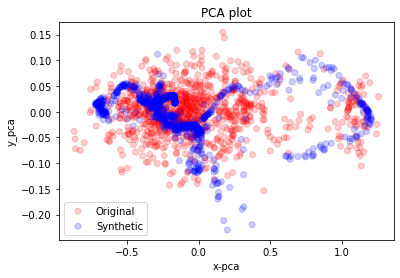

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.089s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.020241
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.431587
[t-SNE] KL divergence after 300 iterations: 0.864286


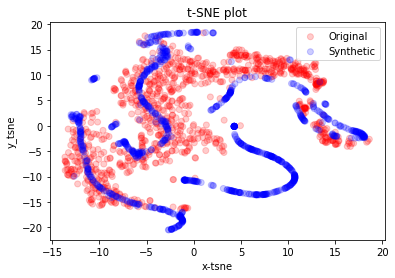

In [12]:
visualization(train_data, generated_data, 'pca')
visualization(train_data, generated_data, 'tsne')

In [13]:
!mv ./pca-results-energy-sce2-wTest-0-005-2.png ./figures_timegan_sce2_wTest
!mv ./tsne-results-energy-sce2-wTest-0-005-2.png ./figures_timegan_sce2_wTest

mv: cannot stat './pca-results-energy-sce2-wTest-0-005-2.png': No such file or directory
mv: cannot stat './tsne-results-energy-sce2-wTest-0-005-2.png': No such file or directory
